In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('../EDA/result3.csv')
df['location_count'] = df['location'].apply(lambda x: len(eval(x)))
df.drop('location',axis=1, inplace=True)
df

,programming language,tiobe index ratings,job amount,average salary,linkedin skill,avg wiki views (monthly),github user count,average search count,stack overflow count,location_count
0,Java,10.51,728,6.153528e+06,103000,3925.598214,6800,28.133930,2531,12
1,JavaScript,3.54,1111,6.168157e+06,118000,5276.794643,11400,15.482143,4633,12
2,Dart,0.56,32,6.250161e+06,945,52.953846,877,37.000000,963,6
3,Node.js,0.00,450,5.596209e+06,34000,662.803571,-1,2.633929,2207,8
4,PHP,1.21,505,5.762279e+06,123000,4083.750000,8600,26.616071,3147,11
...,...,...,...,...,...,...,...,...,...,...
170,Dc,0.00,1,5.592859e+06,0,-1.000000,-1,0.000000,0,1
171,VBScript,0.33,2,3.327448e+06,692,175.750000,-1,21.366070,0,1
172,CORAL,0.00,1,3.244448e+06,0,-1.000000,-1,0.000000,0,1
173,UniVerse,0.00,1,1.520833e+06,0,-1.000000,-1,0.000000,0,1


In [3]:
# standardize the data
scaler = StandardScaler()
df[['tiobe index ratings_T','job amount_T','average salary_T','linkedin skill_T',
    	'avg wiki views (monthly)_T','github user count_T','average search count_T',
        'stack overflow count_T','location_count_T']] = scaler.fit_transform(df[['tiobe index ratings','job amount',
        'average salary','linkedin skill',
    	'avg wiki views (monthly)','github user count','average search count',
        'stack overflow count','location_count']])

df

,programming language,tiobe index ratings,job amount,average salary,linkedin skill,avg wiki views (monthly),github user count,average search count,stack overflow count,location_count,tiobe index ratings_T,job amount_T,average salary_T,linkedin skill_T,avg wiki views (monthly)_T,github user count_T,average search count_T,stack overflow count_T,location_count_T
0,Java,10.51,728,6.153528e+06,103000,3925.598214,6800,28.133930,2531,12,4.602523,4.471072,-0.234475,4.029507,3.723636,5.065941,1.367345,2.977634,2.917045
1,JavaScript,3.54,1111,6.168157e+06,118000,5276.794643,11400,15.482143,4633,12,1.395774,7.029718,-0.232846,4.658651,5.112086,8.626879,0.549330,5.738184,2.917045
2,Dart,0.56,32,6.250161e+06,945,52.953846,877,37.000000,963,6,0.024739,-0.178580,-0.223714,-0.250981,-0.255779,0.480846,1.940589,0.918385,0.930730
3,Node.js,0.00,450,5.596209e+06,34000,662.803571,-1,2.633929,2207,8,-0.232905,2.613884,-0.296539,1.135443,0.370885,-0.198829,-0.281385,2.552126,1.592835
4,PHP,1.21,505,5.762279e+06,123000,4083.750000,8600,26.616071,3147,11,0.323790,2.981313,-0.278045,4.868366,3.886148,6.459352,1.269206,3.786625,2.585993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Dc,0.00,1,5.592859e+06,0,-1.000000,-1,0.000000,0,1,-0.232905,-0.385677,-0.296912,-0.290617,-0.311220,-0.198829,-0.451684,-0.346320,-0.724532
171,VBScript,0.33,2,3.327448e+06,692,175.750000,-1,21.366070,0,1,-0.081079,-0.378996,-0.549193,-0.261592,-0.129597,-0.198829,0.929762,-0.346320,-0.724532
172,CORAL,0.00,1,3.244448e+06,0,-1.000000,-1,0.000000,0,1,-0.232905,-0.385677,-0.558436,-0.290617,-0.311220,-0.198829,-0.451684,-0.346320,-0.724532
173,UniVerse,0.00,1,1.520833e+06,0,-1.000000,-1,0.000000,0,1,-0.232905,-0.385677,-0.750381,-0.290617,-0.311220,-0.198829,-0.451684,-0.346320,-0.724532


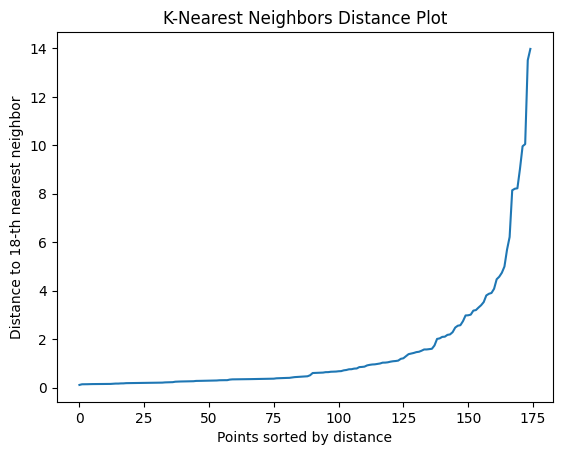

In [8]:
from sklearn.neighbors import NearestNeighbors

min_samples = 18  # This is an initial value, can be adjusted based on intuition or trials

features_scaled = df[['tiobe index ratings_T','job amount_T','average salary_T','linkedin skill_T',
    	'avg wiki views (monthly)_T','github user count_T','average search count_T',
        'stack overflow count_T','location_count_T']]

# Calculate the distance to the k-th nearest neighbor for each point
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(features_scaled)
distances, indices = neighbors_fit.kneighbors(features_scaled)

# Sort distances and plot to find the 'elbow' point
distances = np.sort(distances[:, min_samples - 1])
plt.plot(distances)
plt.title("K-Nearest Neighbors Distance Plot")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"Distance to {min_samples}-th nearest neighbor")
plt.show()

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Adjusting min_samples
min_samples = 3  # Try reducing this incrementally to 5, etc.

# Expanding eps search range
eps_range = np.arange(1, 10, 0.5)  # Testing a broader range of eps values

best_eps = None
best_score = -1

for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(features_scaled)
    
    # Check if clusters are formed (more than one cluster and not all points noise)
    if len(set(labels)) > 1 and all(label != -1 for label in labels):
        score = silhouette_score(features_scaled, labels)
        
        if score > best_score:
            best_score = score
            best_eps = eps

print(f'Best eps: {best_eps}, Best silhouette score: {best_score}')



Best eps: 6.0, Best silhouette score: 0.8015845328524691


In [18]:
dbscan = DBSCAN(eps=6, min_samples=3)
dbscan.fit(features_scaled)

# Get cluster labels
labels = dbscan.labels_
df['cluster'] = labels
df

,programming language,tiobe index ratings,job amount,average salary,linkedin skill,avg wiki views (monthly),github user count,average search count,stack overflow count,location_count,tiobe index ratings_T,job amount_T,average salary_T,linkedin skill_T,avg wiki views (monthly)_T,github user count_T,average search count_T,stack overflow count_T,location_count_T,cluster
0,Java,10.51,728,6.153528e+06,103000,3925.598214,6800,28.133930,2531,12,4.602523,4.471072,-0.234475,4.029507,3.723636,5.065941,1.367345,2.977634,2.917045,0
1,JavaScript,3.54,1111,6.168157e+06,118000,5276.794643,11400,15.482143,4633,12,1.395774,7.029718,-0.232846,4.658651,5.112086,8.626879,0.549330,5.738184,2.917045,0
2,Dart,0.56,32,6.250161e+06,945,52.953846,877,37.000000,963,6,0.024739,-0.178580,-0.223714,-0.250981,-0.255779,0.480846,1.940589,0.918385,0.930730,1
3,Node.js,0.00,450,5.596209e+06,34000,662.803571,-1,2.633929,2207,8,-0.232905,2.613884,-0.296539,1.135443,0.370885,-0.198829,-0.281385,2.552126,1.592835,1
4,PHP,1.21,505,5.762279e+06,123000,4083.750000,8600,26.616071,3147,11,0.323790,2.981313,-0.278045,4.868366,3.886148,6.459352,1.269206,3.786625,2.585993,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Dc,0.00,1,5.592859e+06,0,-1.000000,-1,0.000000,0,1,-0.232905,-0.385677,-0.296912,-0.290617,-0.311220,-0.198829,-0.451684,-0.346320,-0.724532,1
171,VBScript,0.33,2,3.327448e+06,692,175.750000,-1,21.366070,0,1,-0.081079,-0.378996,-0.549193,-0.261592,-0.129597,-0.198829,0.929762,-0.346320,-0.724532,1
172,CORAL,0.00,1,3.244448e+06,0,-1.000000,-1,0.000000,0,1,-0.232905,-0.385677,-0.558436,-0.290617,-0.311220,-0.198829,-0.451684,-0.346320,-0.724532,1
173,UniVerse,0.00,1,1.520833e+06,0,-1.000000,-1,0.000000,0,1,-0.232905,-0.385677,-0.750381,-0.290617,-0.311220,-0.198829,-0.451684,-0.346320,-0.724532,1


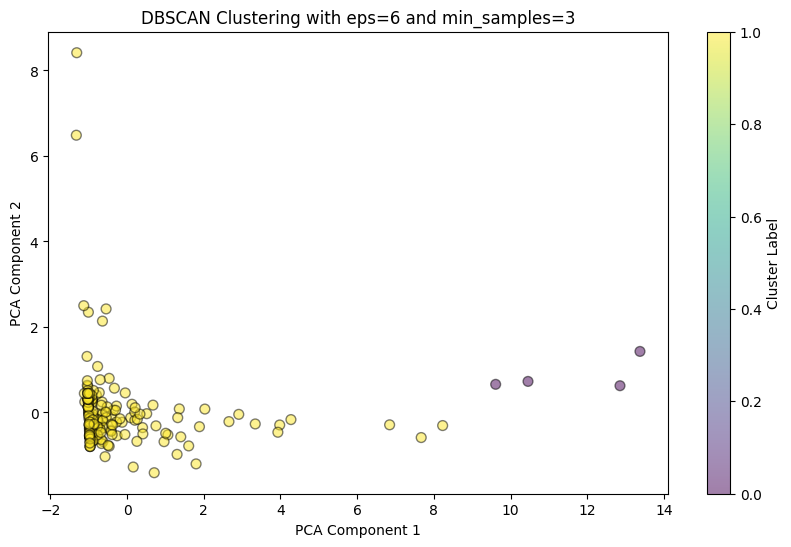

In [22]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis', marker='o', s=50, edgecolor='k', alpha=0.5)
plt.title("DBSCAN Clustering with eps=6 and min_samples=3")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()


In [20]:
# Calculate silhouette score (ignoring noise points labeled as -1)
if len(set(labels)) > 1:
    score = silhouette_score(features_scaled, labels, metric='euclidean')
    print(f"Silhouette Score for DBSCAN (eps=6, min_samples=3): {score}")
else:
    print("Only one cluster found; silhouette score is not meaningful.")

Silhouette Score for DBSCAN (eps=6, min_samples=3): 0.8015845328524691
